# Chapter 2
## Training simple machine learning algorithms for classification

### Formal definition of an artificial neuron (Rosenblatt)

#### Decision function
Define the decision function as a step function:
$$\sigma(z) = \left\{
                    \begin{array}{ll}
                        1 & \quad z \geq \theta \\
                        0 & \quad \text{otherwise}
                    \end{array}
                \right.
$$
Where $\theta$ is a defined threshold

The function argument (aka *net input*) is defined as:
$$
    z = \vec{x} \cdot \vec{w}
$$
Where $\vec{x}$ is a training input and $\vec{w}$ is a weight vector

<a href = 'matrix_dot'></a>
Rewrite in matrix multiplication:
$$
    z = \bf{x}^T\bf{w} = \sum_{m} x_iw_i
$$

#### The bias unit
We can rewrite the $\sigma(z)$ condition as
$$
    z \geq \theta \implies z - \theta \geq 0
$$

and define the bias unit as 
$$
    b = - \theta
$$

Which means
$$
    z = \bf{x}^T\bf{w} + b
$$

#### Final form of the decision function $\sigma$
Using the bias unit we can write $\sigma(z)$ as
$$\sigma(z) = \left\{
                    \begin{array}{ll}
                        1 & \quad z \geq 0 \\
                        0 & \quad \text{otherwise}
                    \end{array}
                \right.
$$

### The perceptrion training rule using the $\sigma(z)$ decision function
In order to train $\sigma(z)$ we need to determine $\bf{w}$ by the following algorithm:
1. Initialize $\bf{w}$ and $\bf{b}$ as zero or random weights (usually small)
2. For every training example $\bf{x}^{(i)}$ compute a predicted class value $\hat{y}^{(i)}$ then update $\bf{w}$ and $\bf{b}$ based on correct classification.

The change in the weight and the bias unit is defined by:
$$
\Delta\bf{w}_j = \eta(y^{(i)} - \hat{y}^{(i)})x_j^{(i)}
$$ 
where $w_j$ is the jth weight corresponding to the $x_j$ feature in the training sample and 
$$
\Delta\bf{b} = \eta(y^{(i)} - \hat{y}^{(i)})
$$
(NB: $\eta$ is the learning weight, a hyperparameter; and $y^{(i)}$ is the true value for the ith training example)

Note that this algorithm can only predict on datasets where the points are linearly seperable.

### Implementing the perceptron in python

In [4]:
import numpy as np
import pydataset as pydata
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
class Perceptron:
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta #learning rate
        self.n_iter = n_iter #number of epochs
        self.random_state = random_state #random state to initialize weights
        
    def fit(self, X, y):
        #X is a collection of training vectors and y is a collection of correct classifications
        #set initial weight and bias unit
        rgen = np.random.RandomState(self.random_state)
        # initialize weights as small, normally distributed, random values
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        #bias unit is set to zero initially
        self.b_ = np.float_(0.)
        #list to hold misclassified items
        self.errors_ = list()
        #move through the epochs
        for _ in range(self.n_iter):
            errors = 0
            #move through each traning example and pair it with the correct target
            for xi, target in zip(X, y):
                #compute the update multiplier
                update = self.eta * (target - self.predict(xi))
                #update the weights
                self.w_ += update * xi
                #update the bias unit
                self.b_ += update
                #check if there was an error,
                # if the update wasn't zero, get a boolean represented by 0 or 1
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        #calculates teh dot product to get the z for the decision function
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        #the decision function
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [6]:
## use perceptron class to predict on iris
#get data set
df = pydata.data('iris')
# select setosa and versicolor only for one-versus-one predictions
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', 0, 1)
# get data rows for sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

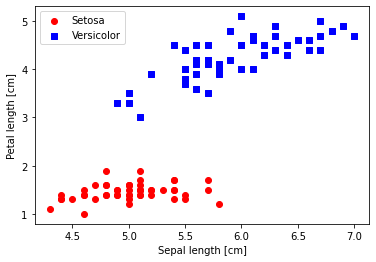

In [7]:
#plot extracted data
plt.scatter(X[:50, 0], X[:50, 1],
color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [8]:
# make perceptron object
ppn = Perceptron(eta = 0.1, n_iter = 10)
# fit the perceptron object
ppn.fit(X, y)

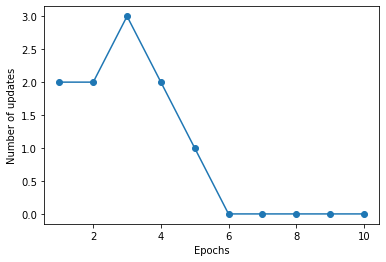

In [9]:
# plot the epochs
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

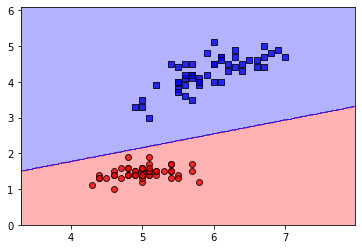

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

plot_decision_regions(X,y,ppn)

## Implementing Adaline

- Adaline = ADAptive LInear NEuron
- Uses the Widrow-Hoff (aka Adaline) Rule: the input function updates weights based on a continuous *activation* function, in this case, the identity function.  The activation's functions output is used to compute the error, which then determines the weight updates
- The final prediction still uses the threshold function for the final prediciton

### Minimizing Loss Function with Gradient Descent

- Weights are updated through a defined *objective function* which is optimized during the learning process
- An advantage of this objective function is that it is differentiable and convex, allowing for ease of finding local minimums to optimize it via *gradient descent*
- *Gradient descent* takes the negative of the gradient of the function and stepping in that direction (see: https://en.wikipedia.org/wiki/Gradient_descent)
- For Adaline this is the Mean Square Error:
$$
    L(w, b) = \frac{1}{2n}\sum_{i=1}^n (y^{(i)} - \sigma(z^{(i)}))^2
$$

Update of the weights and bias unit becomes:
$$
    \Delta w = -\eta\nabla_w L(w, b), \Delta b = -\eta\nabla_b L(w, b)
$$

Recall that the gradient is calculated as:
$$
    \nabla f(p) = \begin{bmatrix} \frac{\partial f}{\partial x_1}(p) \\ \vdots \\ \frac{\partial f}{\partial x_n}(p) \end{bmatrix}
$$

Derivation:
$$
    \frac{\partial L}{\partial w_j} = \frac{\partial}{\partial w_j} \frac{1}{n} \sum_{i=1}^n (y^{(i)} - \sigma(z^{(i)}))^2
$$

Move constant multilier outside of derivative and apply the [chain rule](https://en.wikipedia.org/wiki/Chain_rule):

$$
    \frac{\partial L}{\partial w_j} = \frac{2}{n} \sum_{i=1}^n (y^{(i)} - \sigma(z^{(i)}))^2 \frac{\partial}{\partial w_j} (y^{(i)} - \sigma(z^{(i)}))^2
$$

Derivative of a constant is 0, and the derivative of x is 1 (note minus sign before the summation):

$$
    \frac{\partial L}{\partial w_j} = \frac{2}{n} \sum_{i=1}^n (y^{(i)} - \sigma(z^{(i)}))^2 (-x^{(i)}_j) = - \frac{2}{n} \sum_{i=1}^n (y^{(i)} - \sigma(z^{(i)}))^2 (x^{(i)}_j) = -\eta\frac{\partial L}{\partial w_j} 
$$

Therefore:

$$
    \Delta w_j = - \frac{2}{n} \sum_{i=1}^n (y^{(i)} - \sigma(z^{(i)}))^2 (x^{(i)}_j) = -\eta\frac{\partial L}{\partial w_j} 
$$

By a similar process:

$$
    \Delta b = - \frac{2}{n} \sum_i (y^{(i)} - \sigma(z^{(i)})) = -\eta\frac{\partial L}{\partial b} 
$$

Note that the summation means that all of the parameters simultaneously.  Updateing the weights simultaneously for all the training examples is called *batch gradient descent*, and *full batch gradient descent*.

## Implementing Adaline in python with numpy

- similar to the perceptron implementation
- need to change the `fit` method in order to use the gradient descent method
- note that `fit` now has a single for loop because of the full batch gradient descent, which uses the whole training data set
- the weight update could be updated individually via a `for` loop; but this is rewritten as a dot product (see <a href='#matrix_dot'>here</a> for info)

In [14]:
class AdalineGD:
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta #learning rate
        self.n_iter = n_iter #number of epochs
        self.random_state = random_state #random state to initialize weights
        
    def fit(self, X, y):
        #X is a collection of training vectors and y is a collection of correct classifications
        #set initial weight and bias unit
        rgen = np.random.RandomState(self.random_state)
        # initialize weights as small, normally distributed, random values
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        #bias unit is set to zero initially
        self.b_ = np.float_(0.)
        #list to hold the loss function outputs
        self.losses_ = list()
        #move through the epochs
        for i in range(self.n_iter):
            #calculate the net input (i.e. z)
            net_input = self.net_input(X)
            #calculate the loss via the activation function
            output = self.activation(net_input)
            #calculate error as how far off the activation function was
            errors = y - output
            #update weights
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            #update bia unit
            self.b_ += self.eta * 2.0 * errors.mean()
            #calculate the loss
            loss = (errors**2).mean()
            #add to the loss list
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        #calculates teh dot product to get the z for the decision function
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        #activation for adaline is the identity function
        return X
    
    def predict(self, X):
        #the decision function
        return np.where(self.net_input(X) >= 0.5, 1, 0)

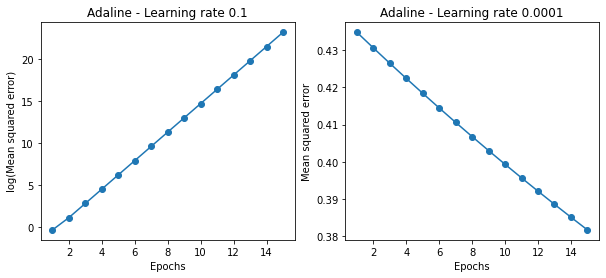

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

The above graph shows two problems:
- with too large η the gradient descent algorithm overshoots the minimum
- with too small η the gradient descent algorithm needs a lot of epochs to converge

Some of these problems can be solved through *feature scaling* and *standardization* which helps the gradient descent converge more quickly.  In un-standardized features, the optimal η might be different for the weights and bias unit. Note that this does not normalize the data, but shift the mean to 0 with a standard deviation of 1.

In [16]:
#computes the z score for every feature
def standardize_features(X):
    X_std = np.copy(X)
    for i in range(X_std.shape[1]):
        X_std[:, i] = (X[:, i] - X[:, i].mean()) / X[:, i].std()
    return X_std

In [21]:
X_std = standardize_features(X)
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

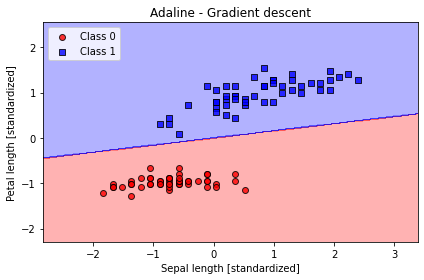

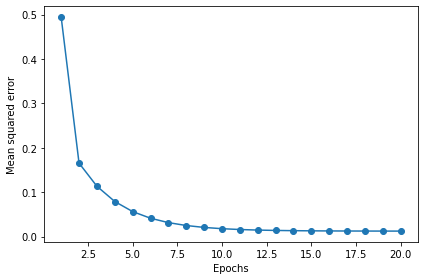

In [24]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

## Large scale machine learning with stochastic gradient descent

- updating as a full batch gradient descent can be computationally intensive
- an alternatice to full batch gradient descent is *stochastic gradient descent*, which updates the weight incrementally:
$$
    \Delta w_j = \eta(y^{(i)} - \sigma(z^{(i)}))x_j^{(i)}, \Delta b = \eta(y^{(i)} - \sigma(z^{(i)}))
$$
- this can help reach a convergence faster
- another advantage is *online learning* where new training data is continually added
- for best performance, training data should be presented in a random order; and every epoch, the training data should be reset in a random order
- (NB: an alternative compromise is *mini batch gradient descent* where subsets of the weights are re-calculated)

### python implementation of adaline with stochastic gradient descent
- `partial_fit` will implement *online learning*, as it does not reinitialize weights
- note how much faster the average loss converges towards 0 in the visualization

In [36]:
class AdalineSGD:
    
    def __init__(self, eta = 0.01, n_iter = 50, shuffle = True, random_state = 1):
        self.eta = eta #learning rate
        self.n_iter = n_iter #number of epochs
        self.random_state = random_state #random state to initialize weights
        #determine initial weights
        self.w_initialized = False
        self.shuffle = shuffle
        
    def fit(self, X, y):
        #X is a collection of training vectors and y is a collection of correct classifications
        #initialize weights via a private class method
        self._initialize_weights(X.shape[1])
        #to store losses
        self.losses_ = list()
        #move through the epochs
        for i in range(self.n_iter):
            if self.shuffle:
                #shuffle option flagged, shuffle the training set
                X, y = self._shuffle(X, y)
            # store the losses
            losses = list()
            for xi, target in zip(X, y):
                #update weight for the X incrementally
                losses.append(self._update_weights(xi, target))
            #get average loss
            avg_loss = np.mean(losses)
            #append to list of losses
            self.losses_.append(avg_loss)
        return self
    
    def partial_fit(self, X, y):
        #fit training without initializing the weights
        if not self.w_initialized:
            #weights were not initialized, initialize them
            self._initialize_weights(X.shape[1])
        #.ravel() flattens the array
        if y.ravel().shape[0] > 1:
            #there is more than one training record, loop through them
            #updating for each one
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            #there is only one training record, update based on it
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        #generate a random sequence of numbers in range (0, len(y))
        #use these to shuffle the training sets
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        #initializes weight to small random numbers
        #generate random numbers
        self.rgen = np.random.RandomState(self.random_state)
        #set the weights to normally distributed random nunbers
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = m)
        #set bias unit
        self.b_ = np.float_(0.)
        #change flag
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        #get the initial output of the activation function
        output = self.activation(self.net_input(xi))
        #calculate the error
        error = (target - output)
        #uodate weight and bias unit
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        #calculate loss
        loss = error ** 2
        return loss
    
    def net_input(self, X):
        #calculates teh dot product to get the z for the decision function
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        #activation for adaline is the identity function
        return X
    
    def predict(self, X):
        #the decision function
        return np.where(self.net_input(X) >= 0.5, 1, 0)

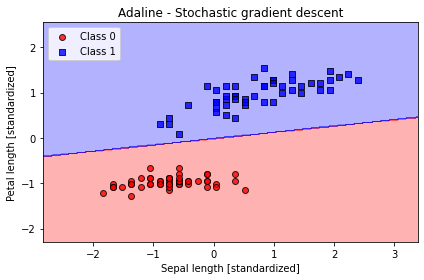

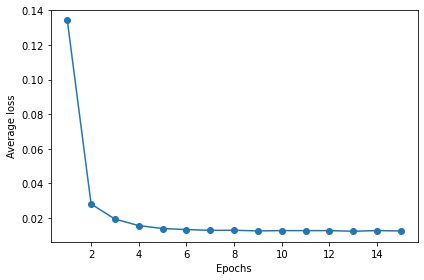

In [37]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()